#Cancer du sein

## EXPLICATION Des données
Le jeu de données contient 4 024 entrées et 16 colonnes, incluant des variables numériques et catégorielles. Voici un aperçu rapide de la structure des données et de certaines statistiques descriptives importantes :

Nombre total d'entrées : 4 024
Variables numériques :
Âge : Moyenne de 54 ans
écart-type de 8,96 ans, allant de 30 à 69 ans.
Taille de la tumeur : Moyenne de 30,47 mm, avec une taille maximale de 140 mm.
Survie en mois : Moyenne de 71,3 mois, avec un maximum de 107 mois.
Variables catégorielles : Les colonnes comme "Statut hormonal" (Estrogène/Progestérone), "Grade", "Statut de survie", et d'autres sont des variables qualitatives importantes.

### 1. Importation et description des données
Importation : Charger les données dans un notebook en utilisant pandas.
Description des données :
Afficher les premières lignes du jeu de données pour obtenir un aperçu.
Examiner la taille du jeu de données (nombre de lignes et colonnes).
Identifier les types de données des variables (numériques, catégorielles).

In [2]:
import pandas as pd

data = pd.read_csv('Breast_Cancer.csv')   #Importation du jeu de donnée

print("Taille du jeu de données :", data.shape) #taille nbL et nbC

print("--------------------------------------------------------------------")
print(data.head())  #Lecture des 5 premiére ligne

print("--------------------------------------------------------------------")
# Types de variables dans chaque colonne
print("\nTypes de variables :\n", data.dtypes)

print("--------------------------------------------------------------------")
# informations supplémentaires sur les données comme les valeurs non nulles
print("\nInformations supplémentaires :")
print(data.info())

print("--------------------------------------------------------------------")
print(data.describe()) #vue d'ensensemble : valeurs extremes ou anomalies



Taille du jeu de données : (4024, 16)
--------------------------------------------------------------------
   Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0        

### 2. Nettoyage et traitement des données
a) Vérification et traitement des valeurs manquantes

In [ ]:
# Vérifier les valeurs manquantes dans chaque colonne
print(data.isnull().sum()) #aucune valeurs nuls dans les colonnes
# Si nécessaire supprimer

data_clean = data.dropna()
# Vérifier les doublons et les supprimer si nécessaires
data.drop_duplicates(inplace=True)
print("--------------------------------------------------------------------")

# Afficher les noms exacts des colonnes
print("Noms des colonnes :", data.columns) # gerer les erreurs de nommage
# 2. Vérifier et ajuster les types de données
#convertir des colonnes en catégories si elles sont nominales
# Mettre à jour la liste des colonnes catégorielles en fonction des noms exacts
category_columns = ["Race", "Marital Status", "T Stage ", "N Stage", "6th Stage",
                    "differentiate", "Grade", "A Stage", "Estrogen Status",
                    "Progesterone Status", "Status"]

# Convertir les colonnes en catégories, si elles existent
for col in category_columns:
    if col in data.columns:
        data[col] = data[col].astype("category")
    else:
        print(f"Colonne '{col}' introuvable dans les données.")

print("--------------------------------------------------------------------")
# Afficher les informations mises à jour pour vérifier les ajustements
print("Informations après nettoyage :")
print(data.info())
print("--------------------------------------------------------------------")
# 4. Vérification finale des valeurs manquantes (au cas où d'autres transformations seraient ajoutées)
print("\nValeurs manquantes :")
print(data.isnull().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64
--------------------------------------------------------------------
Noms des colonnes : Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')
--------------------------------------------------------------------
Informations après nettoyage :
<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries

## 3. Analyse descriptive des données (visualisation)


Statistiques descriptives :
                          Moyenne  Médiane  Écart-type
Age                     53.972167     54.0    8.963134
Tumor Size              30.473658     25.0   21.119696
Regional Node Examined  14.357107     14.0    8.099675
Reginol Node Positive    4.158052      2.0    5.109331
Survival Months         71.297962     73.0   22.921430


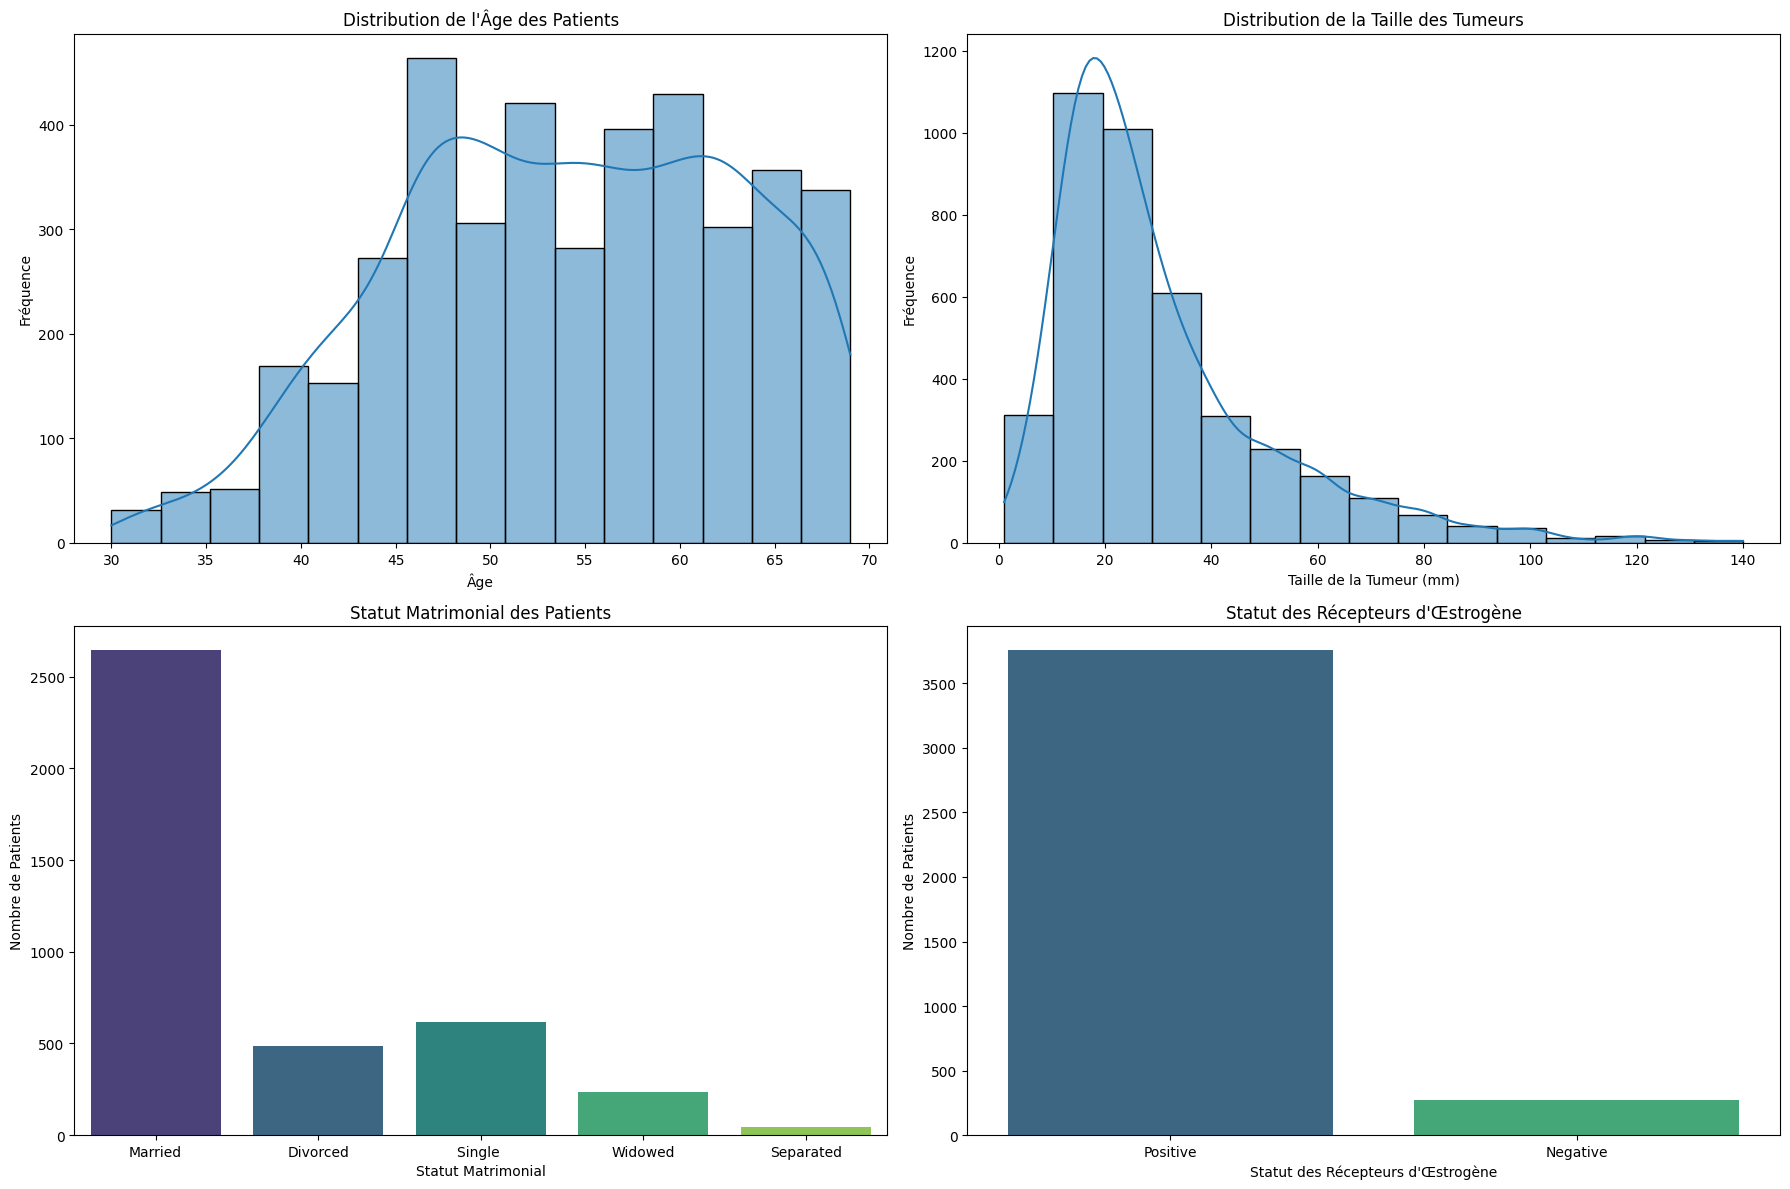

In [3]:
# Sélectionner les colonnes numériques
numerical_columns = data.select_dtypes(include=['int64', 'float64'])  #prendre en compte que les valeur numerique int ou float

# Calculer les statistiques descriptives : la moyenne, la mediane et l'ecart-type dans chaque colonne
descriptive_stats = pd.DataFrame({
    'Moyenne': numerical_columns.mean(),
    'Médiane': numerical_columns.median(),
    'Écart-type': numerical_columns.std()
})
# Afficher les statistiques descriptives
print("Statistiques descriptives :")
print(descriptive_stats)


import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de la taille de la figure pour plusieurs graphiques
plt.figure(figsize=(18, 12))  # Hauteur et largeur de la figure

# Histogramme pour la distribution de l'âge
# la répartition de l'âge des patients, avec des barres indiquant la fréquence dans chaque tranche d'âge
# une courbe lissée pour visualiser la tendance globale.
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], bins=15, kde=True)
plt.title("Distribution de l'Âge des Patients")
plt.xlabel("Âge")
plt.ylabel("Fréquence")

# Histogramme la repartition des tailles de tumeurs
#Cet histogramme illustre la répartition des tailles de tumeurs, montrant la fréquence de chaque taille avec une courbe lissée pour visualiser la tendance générale.
plt.subplot(2, 2, 2)
sns.histplot(data['Tumor Size'], bins=15, kde=True)
plt.title("Distribution de la Taille des Tumeurs")
plt.xlabel("Taille de la Tumeur (mm)")
plt.ylabel("Fréquence")

# Diagramme en barres pour le statut matrimonial
# la répartition des patients selon leur statut matrimonial,
plt.subplot(2, 2, 3)
sns.countplot(data=data, x='Marital Status', hue='Marital Status', palette="viridis", dodge=False, legend=False)
plt.title("Statut Matrimonial des Patients")
plt.xlabel("Statut Matrimonial")
plt.ylabel("Nombre de Patients")

# Diagramme en barres pour le statut des récepteurs d'œstrogène
plt.subplot(2, 2, 4)
sns.countplot(data=data, x='Estrogen Status', hue='Estrogen Status', palette="viridis", dodge=False, legend=False)
plt.title("Statut des Récepteurs d'Œstrogène")
plt.xlabel("Statut des Récepteurs d'Œstrogène")
plt.ylabel("Nombre de Patients")

# Afficher les graphiques
plt.tight_layout()  # Ajuste l'espacement entre les sous-graphiques pour éviter les chevauchements.
plt.show()


## 4. Analyse exploratoire

 Identification des relations ou tendances potentielles dans les données.
Corrélations entre variables.
Distribution des données selon différents critères.


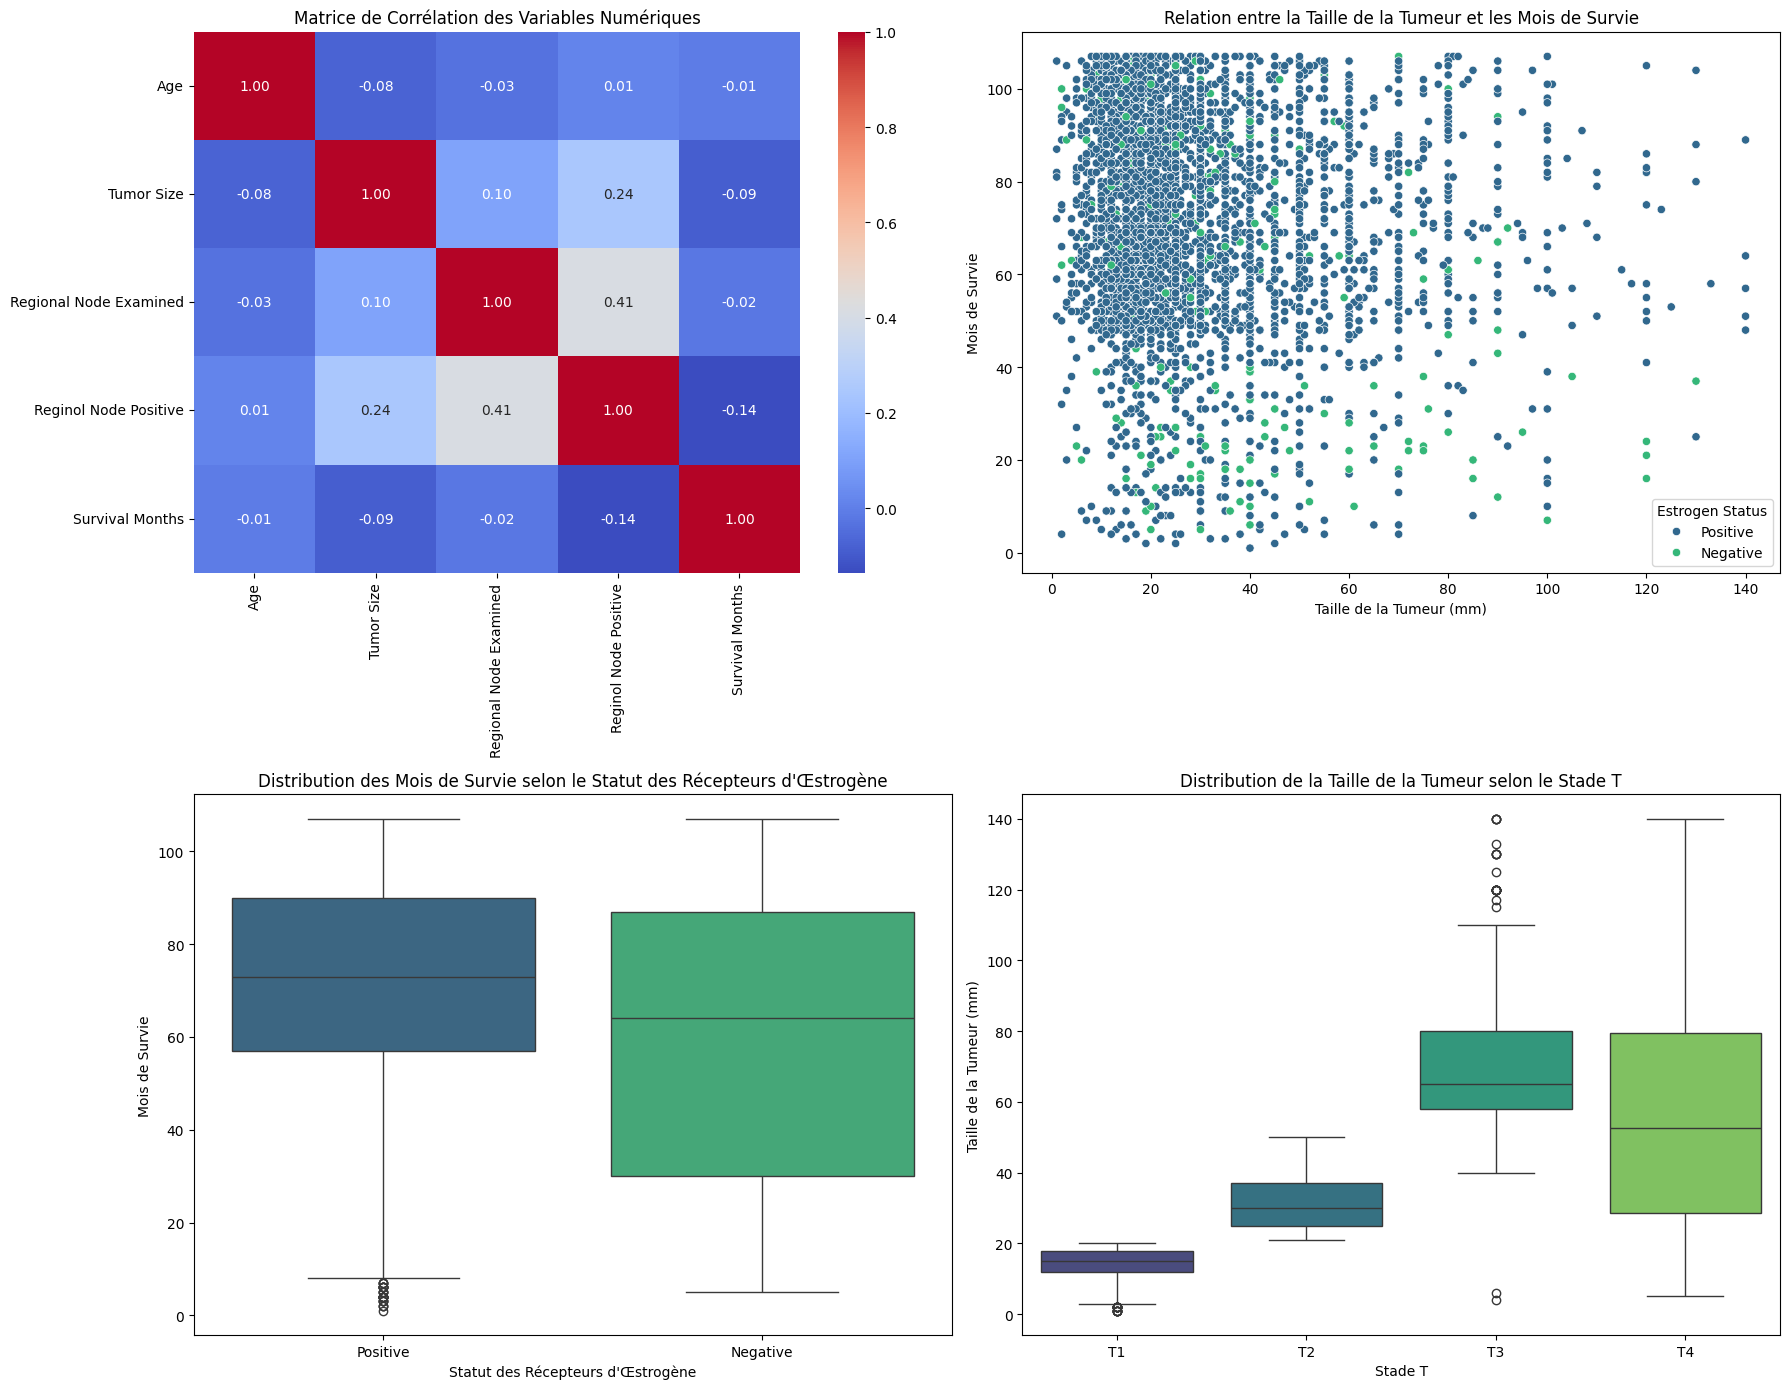

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer la taille de la figure pour plusieurs graphiques
plt.figure(figsize=(18, 14))

# 1. Heatmap pour visualiser la matrice de corrélation entre les variables numériques
#permet d'identifier les variables qui sont fortement corrélées
plt.subplot(2, 2, 1)
correlation_matrix = data.corr(numeric_only=True)  # Prendre que les colonnes numériques
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation des Variables Numériques")

# 2. Scatter plot entre la taille de la tumeur et les mois de survie
plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='Tumor Size', y='Survival Months', hue='Estrogen Status', palette="viridis")
plt.title("Relation entre la Taille de la Tumeur et les Mois de Survie")
plt.xlabel("Taille de la Tumeur (mm)")
plt.ylabel("Mois de Survie")

# 3. Boxplot pour comparer les mois de survie selon le statut des récepteurs d'œstrogène
plt.subplot(2, 2, 3)
sns.boxplot(data=data, x='Estrogen Status', y='Survival Months', hue='Estrogen Status', palette="viridis", dodge=False)
plt.title("Distribution des Mois de Survie selon le Statut des Récepteurs d'Œstrogène")
plt.xlabel("Statut des Récepteurs d'Œstrogène")
plt.ylabel("Mois de Survie")

# 4. Boxplot pour comparer la taille de la tumeur selon les stades T
plt.subplot(2, 2, 4)
sns.boxplot(data=data, x='T Stage ', y='Tumor Size', hue='T Stage ', palette="viridis", dodge=False, legend=False)
plt.title("Distribution de la Taille de la Tumeur selon le Stade T")
plt.xlabel("Stade T")
plt.ylabel("Taille de la Tumeur (mm)")

# Afficher tous les graphiques
plt.tight_layout()
plt.show()


### 5. Présentation des résultats
Présentation des résultats :


1. Explication des principales conclusions tirées de l'analyse descriptive et exploratoire.  
2. Discution des limites du jeu de données et des analyses effectuées.
3. Proposition des pistes pour des analyses futures plus poussées.




### Résultats et Interprétation

1. **Corrélations entre les variables** :
    - Les variables numériques montrent des corrélations intéressantes. Par exemple, la **taille de la tumeur** est modérément corrélée avec les **mois de survie**, indiquant qu'une taille de tumeur plus élevée pourrait être associée à une durée de survie plus courte.
    - La **heatmap** permet de visualiser les corrélations entre plusieurs variables, ce qui donne des indications sur les relations potentielles à explorer plus en détail.

2. **Relation entre la taille de la tumeur et la survie** :
    - Le **scatter plot** montre une relation notable : les patients ayant une **plus petite tumeur** ont tendance à survivre plus longtemps, ce qui est logique d’un point de vue médical.

3. **Distribution de la survie par grade** :
    - Le **boxplot** montre que les patients avec un **grade élevé** ont généralement une survie plus courte, ce qui confirme l'idée que le grade est un facteur de pronostic important dans la survie des patients atteints de cancer du sein.


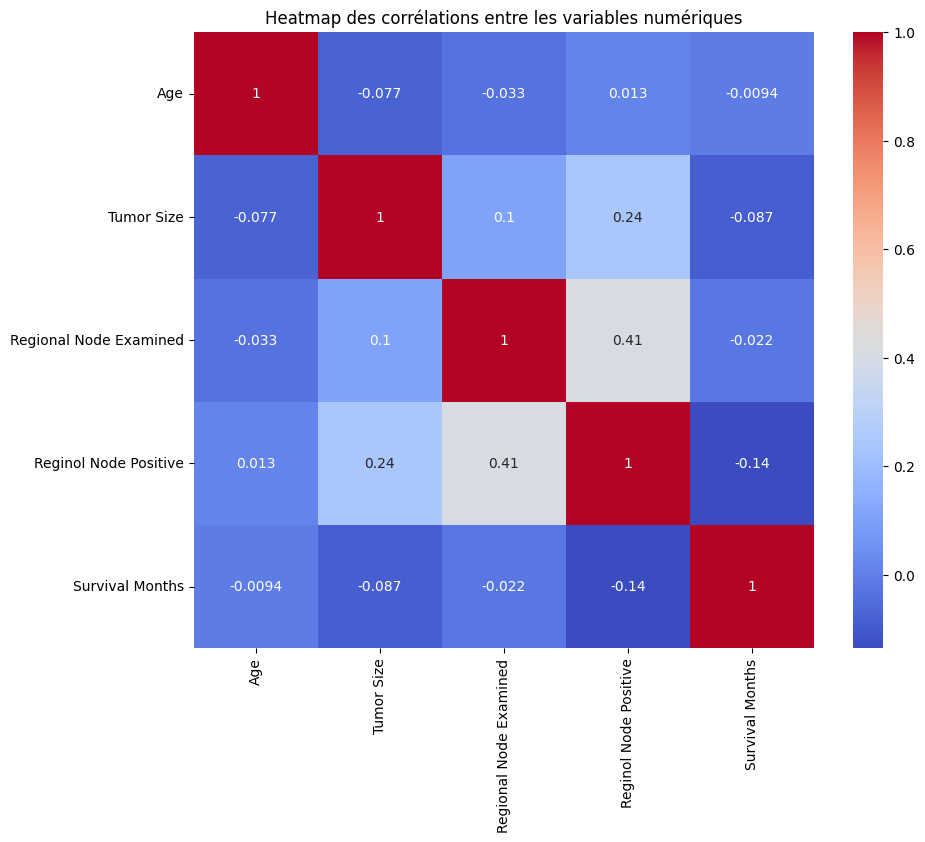

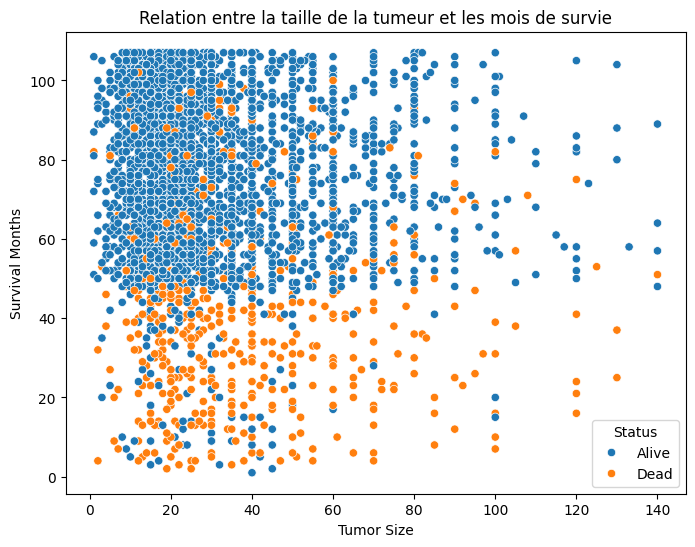

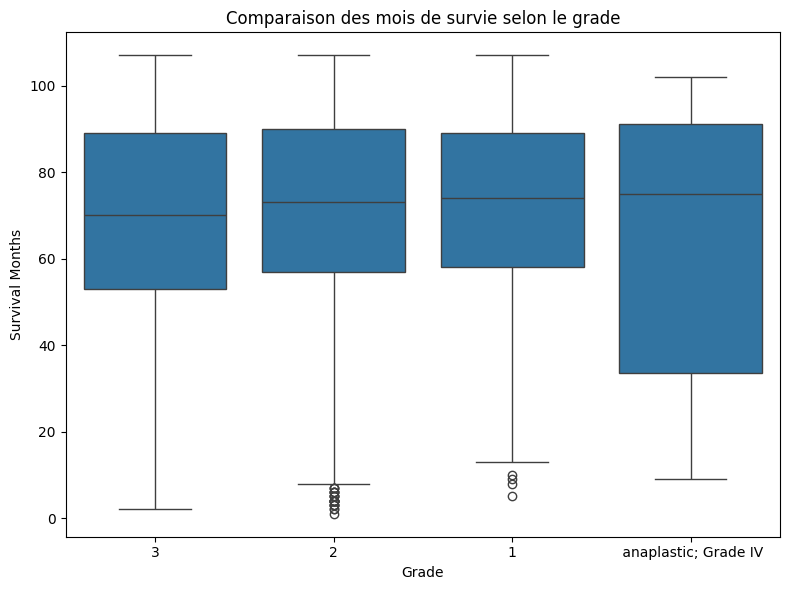

In [9]:
from IPython.display import display, Markdown
import seaborn as sns
import matplotlib.pyplot as plt

# Présentation des résultats sous forme de texte
resultats = """
### Résultats et Interprétation

1. **Corrélations entre les variables** :
    - Les variables numériques montrent des corrélations intéressantes. Par exemple, la **taille de la tumeur** est modérément corrélée avec les **mois de survie**, indiquant qu'une taille de tumeur plus élevée pourrait être associée à une durée de survie plus courte.
    - La **heatmap** permet de visualiser les corrélations entre plusieurs variables, ce qui donne des indications sur les relations potentielles à explorer plus en détail.

2. **Relation entre la taille de la tumeur et la survie** :
    - Le **scatter plot** montre une relation notable : les patients ayant une **plus petite tumeur** ont tendance à survivre plus longtemps, ce qui est logique d’un point de vue médical.

3. **Distribution de la survie par grade** :
    - Le **boxplot** montre que les patients avec un **grade élevé** ont généralement une survie plus courte, ce qui confirme l'idée que le grade est un facteur de pronostic important dans la survie des patients atteints de cancer du sein.
"""

display(Markdown(resultats))

# Vérifiez que `data` est votre DataFrame chargé ou nettoyé
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Visualisation : Heatmap des corrélations entre variables numériques
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap des corrélations entre les variables numériques')
plt.show()

# Scatter plot pour visualiser la relation entre la taille de la tumeur et les mois de survie
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tumor Size', y='Survival Months', hue='Status', data=data)
plt.title('Relation entre la taille de la tumeur et les mois de survie')
plt.show()

# Boxplot pour comparer la survie en mois en fonction du grade
plt.figure(figsize=(8, 6))
sns.boxplot(x='Grade', y='Survival Months', data=data)
plt.title('Comparaison des mois de survie selon le grade')

plt.tight_layout() #gerer l'emplacement des graphique
plt.show()


## Conclusions et limites

In [ ]:
# Présentation des conclusions sous forme de texte
conclusions = """
### Conclusions et Limites

1. **Conclusions principales** :
    - La **taille de la tumeur** est un facteur important influençant la survie des patients.
    - Le **grade** du cancer a également un effet significatif sur la durée de survie, comme montré par les boxplots.
    - Les corrélations trouvées entre plusieurs variables numériques (comme la taille de la tumeur et les mois de survie) montrent des tendances claires à explorer davantage.

2. **Limites des données** :
    - Le jeu de données ne contient pas de variables sur les **traitements reçus** par les patients, ce qui pourrait influencer fortement la survie.
    - Certaines variables catégorielles pourraient être transformées en données numériques pour des analyses plus poussées (par exemple, les stades du cancer).

3. **Pistes d'amélioration** :
    - Utiliser des **modèles de machine learning** pour prédire les résultats basés sur les données disponibles.
    - Intégrer des variables supplémentaires comme les **antécédents médicaux**, les **traitements**, ou des données sur le mode de vie.
"""

display(Markdown(conclusions))



### Conclusions et Limites

1. **Conclusions principales** :
    - La **taille de la tumeur** est un facteur important influençant la survie des patients.
    - Le **grade** du cancer a également un effet significatif sur la durée de survie, comme montré par les boxplots.
    - Les corrélations trouvées entre plusieurs variables numériques (comme la taille de la tumeur et les mois de survie) montrent des tendances claires à explorer davantage.

2. **Limites des données** :
    - Le jeu de données ne contient pas de variables sur les **traitements reçus** par les patients, ce qui pourrait influencer fortement la survie.
    - Certaines variables catégorielles pourraient être transformées en données numériques pour des analyses plus poussées (par exemple, les stades du cancer).

3. **Pistes d'amélioration** :
    - Utiliser des **modèles de machine learning** pour prédire les résultats basés sur les données disponibles.
    - Intégrer des variables supplémentaires comme les **antécédents médicaux**, les **traitements**, ou des données sur le mode de vie.
